<a href="https://colab.research.google.com/github/nadiayerko/Data/blob/main/ProyectoDSParteI%2BYerkovich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ProyectoDSParteI_Yerkovich.ipynb

# 1. ABSTRACT
Este proyecto tiene como objetivo explorar la evolución de la producción de soja en Argentina desde 1941 hasta la actualidad, utilizando un conjunto de datos que registra valores anuales relacionados con la superficie sembrada, la superficie cosechada, el rinde y la producción total. El cultivo de soja ha sido uno de los pilares fundamentales del desarrollo agroindustrial argentino en las últimas décadas, con importantes implicancias económicas, sociales y ambientales. A través de este análisis, se busca identificar patrones y tendencias en el rendimiento y la producción, así como posibles relaciones entre las variables consideradas. Asimismo, se propone evaluar cómo ha evolucionado la eficiencia de producción a lo largo del tiempo y qué factores podrían estar asociados a los aumentos o caídas en el rendimiento promedio. Este estudio se realiza con herramientas de análisis exploratorio de datos en Python, utilizando visualizaciones gráficas e indicadores estadísticos para responder preguntas clave y validar (o refutar) las hipótesis planteadas. Los resultados obtenidos permitirán una mejor comprensión del comportamiento histórico del sector sojero argentino, brindando insumos para futuras investigaciones o decisiones estratégicas en el ámbito agropecuario.

# 2. PREGUNTAS E HIPÓTESIS
Preguntas:
1. ¿Cómo evolucionó la producción total de soja en Argentina desde 1941?
2. ¿Existe una relación entre la superficie sembrada, la superficie cosechada y el rendimiento?
3. ¿Cuáles fueron los períodos de mayor crecimiento en rendimiento (kg/ha)?

Hipótesis:
- H1: El rendimiento medio ha aumentado de forma sostenida con el paso del tiempo.
- H2: Existe una correlación positiva entre superficie sembrada y producción total.
- H3: Las diferencias entre superficie sembrada y cosechada pueden estar asociadas a condiciones climáticas adversas o factores externos.


In [2]:
#CODIGO NO FUNCIONO
import pandas as pd

df = pd.read_csv("Produccion de soja argentina des 1941.csv")
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 340: invalid continuation byte

In [3]:
#Codigo que no funciono
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Para cargar automáticamente el archivo subido
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)

df.head()


Saving Produccion de soja argentina des 1941.csv to Produccion de soja argentina des 1941 (1).csv


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 340: invalid continuation byte

Nuevo codigo para ingresar el archivo .csv desde gemini en colab.

### #ESTE FUNCIONO, EL ARCHIVO .CSV ESTA EN LA CONSOLA DE GOOGLE COLAB, EL PROBLEMA ERAN LOS TILDES Y ENES EN EL NOMBRE DE LAS VARIABLE. PERDON TENGO TECLADO EEUU.

In [4]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Para cargar automáticamente el archivo subido
for file_name in uploaded.keys():
    # Se especifica la codificación 'latin-1' para leer el archivo
    df = pd.read_csv(file_name, encoding='latin-1')

df.head()


Saving Produccion de soja argentina des 1941.csv to Produccion de soja argentina des 1941 (2).csv


,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
0,soja,1941,1941/1942,Santa Fe,82,Belgrano,82007.0,90,90,153,1700
1,soja,1941,1941/1942,Santa Fe,82,Caseros,82014.0,45,35,18,514
2,soja,1941,1941/1942,Santa Fe,82,Constitución,82028.0,50,50,100,2000
3,soja,1941,1941/1942,Santa Fe,82,General López,82042.0,80,65,32,492
4,soja,1941,1941/1942,Santa Fe,82,Iriondo,82056.0,70,70,112,1600


Valores nulos por columna:
cultivo_nombre              0
anio                        0
campania                    0
provincia_nombre            0
provincia_id                0
departamento_nombre         0
departamento_id            49
superficie_sembrada_ha      0
superficie_cosechada_ha     0
produccion_tm               0
rendimiento_kgxha           0
dtype: int64


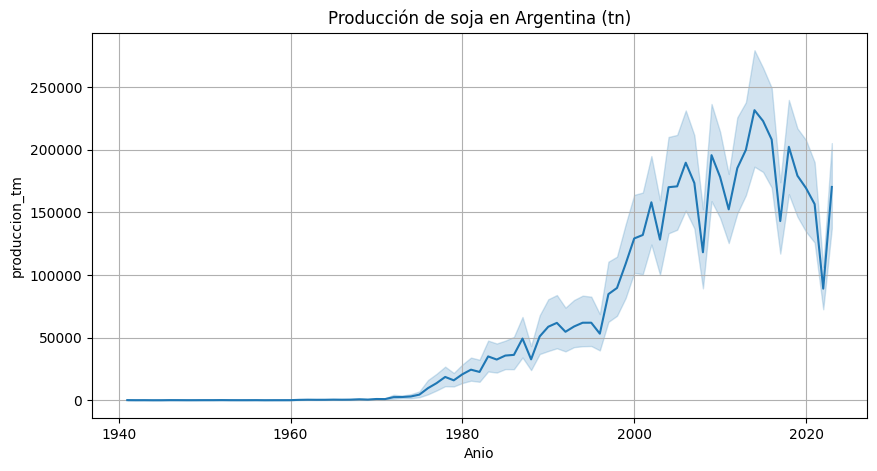

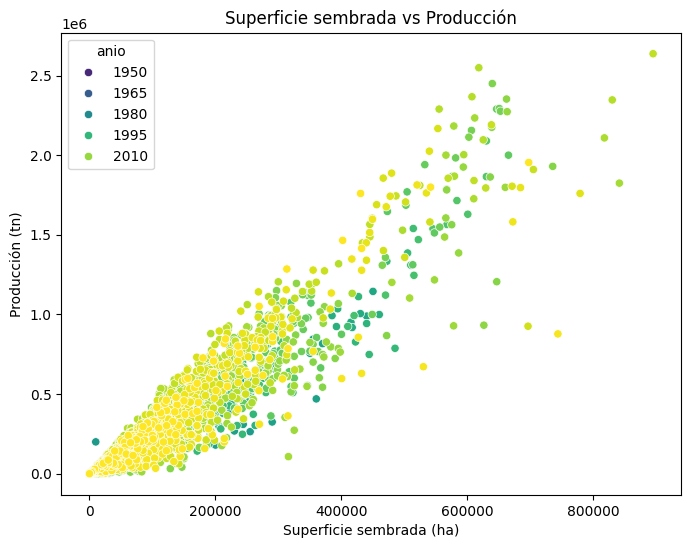

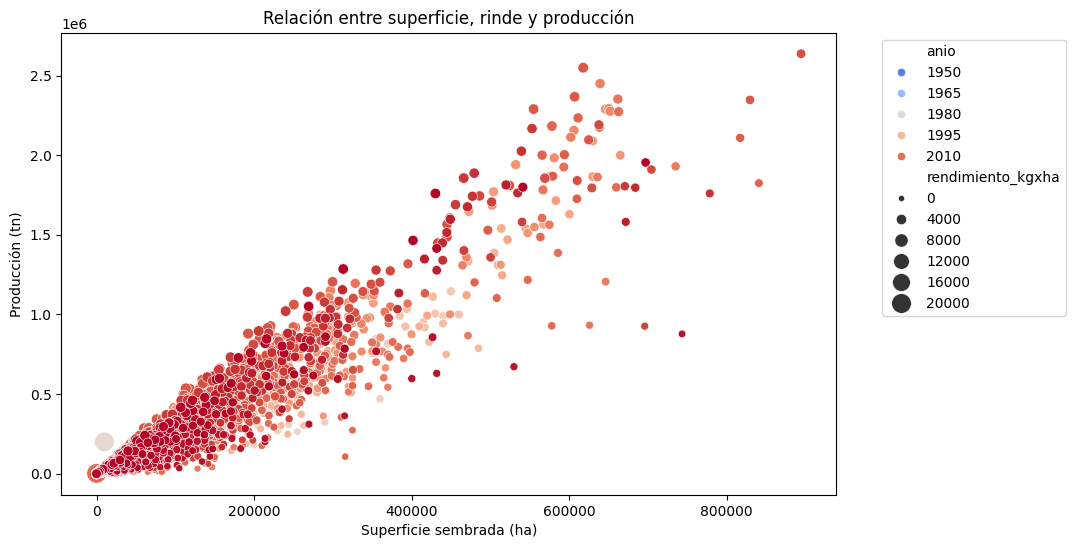

Resumen estadístico:
               anio  provincia_id  departamento_id  superficie_sembrada_ha  \
count  12303.000000  12303.000000     12254.000000            12303.000000   
mean    1997.494595     33.767211     33909.532316            41110.423149   
std       17.483400     30.230639     30120.622579            80938.740280   
min     1941.000000      6.000000      6007.000000                1.000000   
25%     1984.000000      6.000000      6651.000000              680.000000   
50%     2000.000000     22.000000     22049.000000             7000.000000   
75%     2012.000000     54.000000     54112.000000            45455.000000   
max     2023.000000     90.000000     90119.000000           894613.000000   

       superficie_cosechada_ha  produccion_tm  rendimiento_kgxha  
count             12303.000000   1.230300e+04       12303.000000  
mean              39900.288548   1.033344e+05        2007.240836  
std               79365.004380   2.315423e+05         823.110090  
min     

In [11]:
# 3. CARGA Y LIMPIEZA DE DATOS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 4. VALORES PERDIDOS
print("Valores nulos por columna:")
print(df.isnull().sum())

# 5. VISUALIZACIONES
# Univariada: Producción total a lo largo del tiempo
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="anio", y="produccion_tm")
plt.title("Producción de soja en Argentina (tn)")
plt.xlabel("Anio")
plt.ylabel("produccion_tm")
plt.grid(True)
plt.show()

# Bivariada: Superficie sembrada vs producción total
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="superficie_sembrada_ha", y="produccion_tm", hue="anio", palette="viridis")
plt.title("Superficie sembrada vs Producción")
plt.xlabel("Superficie sembrada (ha)")
plt.ylabel("Producción (tn)")
plt.show()

# Multivariada: Relación entre superficie sembrada, rendimiento y producción
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="superficie_sembrada_ha", y="produccion_tm", size="rendimiento_kgxha", hue="anio", palette="coolwarm", sizes=(20, 200))
plt.title("Relación entre superficie, rinde y producción")
plt.xlabel("Superficie sembrada (ha)")
plt.ylabel("Producción (tn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# 6. RESUMENES NUMERICOS
print("Resumen estadístico:")
print(df.describe())

# Correlaciones
print("\nCorrelación entre variables:")
print(df.corr(numeric_only=True))
